# Question 1

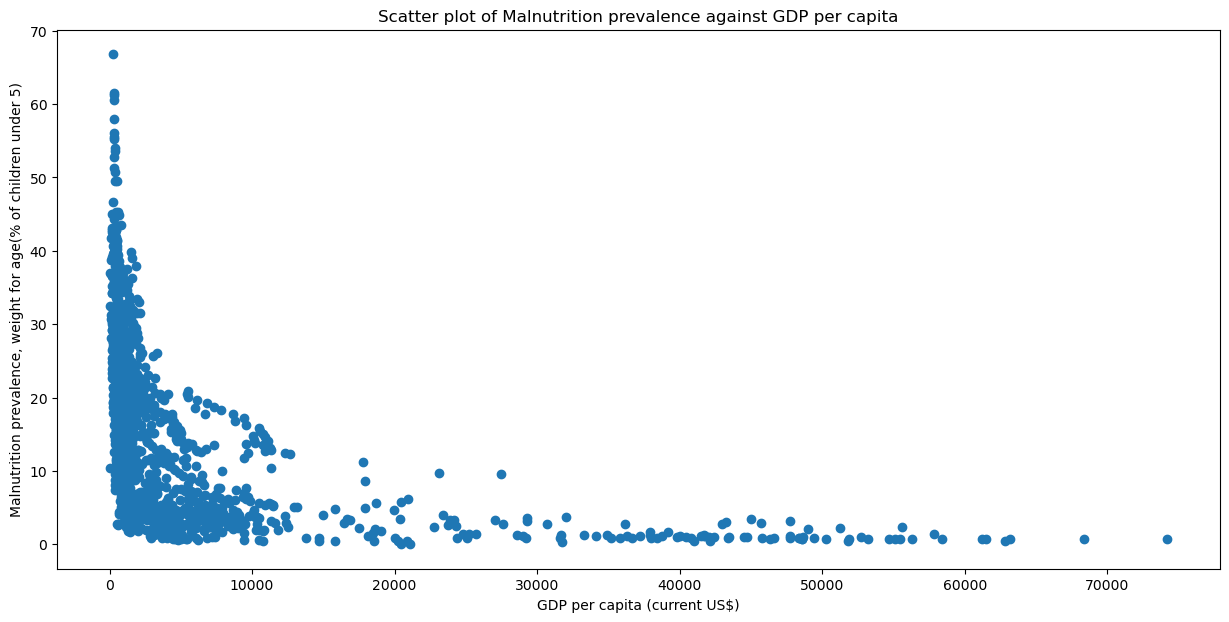

In [1]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# print(dir(wbdata))
# ?wbdata.get_country

#define the indicator for data retrieval
indicators = {'NY.GDP.PCAP.CD':'GDP per capita (current US)', 'SH.STA.MALN.ZS':'Malnutrition prevalence'}

#Retrieve data and drop missing values
data = wbdata.get_dataframe(indicators= indicators,country='all', data_date=None, source=None,convert_date=False,keep_levels=False,cache=True,
).dropna()

#retrieve country information
country_information = pd.DataFrame(wbdata.get_country())
country_information = country_information [['incomeLevel', 'name','region']]
country_information['incomeLevel'] = country_information['incomeLevel'].apply(lambda x: x['id'])
country_information['region'] = country_information['region'].apply(lambda x: x['id'])
country_information = country_information.rename(columns={'name': 'country'})
data.reset_index(inplace=True)

#merge data and country information
merged_data = pd.merge(data, country_information, on='country', how='left')

#Create a scattter plot of malnutrition prevalence against GDP per capita
plt.figure(figsize=(15, 7))
plt.scatter(merged_data['GDP per capita (current US)'], merged_data['Malnutrition prevalence'])
plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Malnutrition prevalence, weight for age(% of children under 5)")
plt.title("Scatter plot of Malnutrition prevalence against GDP per capita")
plt.show()


In [2]:
? wbdata.get_dataframe

In [3]:
data.columns

Index(['country', 'date', 'GDP per capita (current US)',
       'Malnutrition prevalence'],
      dtype='object')

In [4]:
country_information['region'].unique()
country_information.head()

,incomeLevel,country,region
0,HIC,Aruba,LCN
1,NA,Africa Eastern and Southern,NA
2,LIC,Afghanistan,SAS
3,NA,Africa,NA
4,NA,Africa Western and Central,NA


In [5]:
data.reset_index(inplace =True)

C:\Users\Nadine\AppData\Local\Temp\ipykernel_24212\1101980279.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_information['Region'][i] = merged_information['Region'][i-1]
C:\Users\Nadine\AppData\Local\Temp\ipykernel_24212\1101980279.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_information['IncomeGroup'][i] = merged_information['IncomeGroup'][i-1]


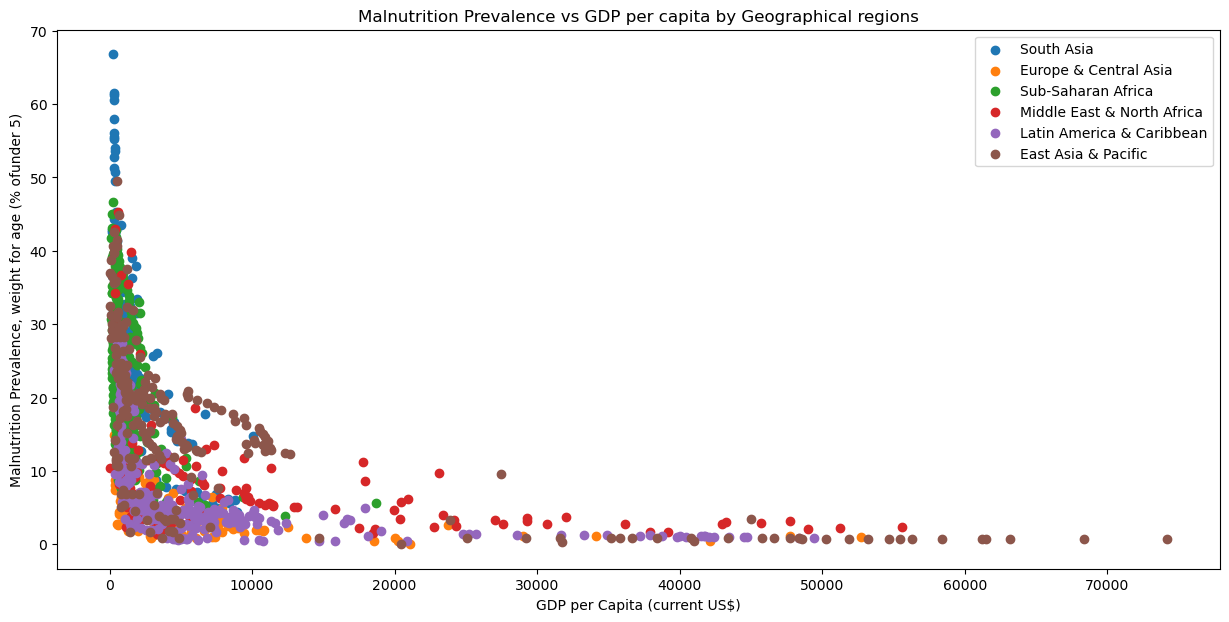

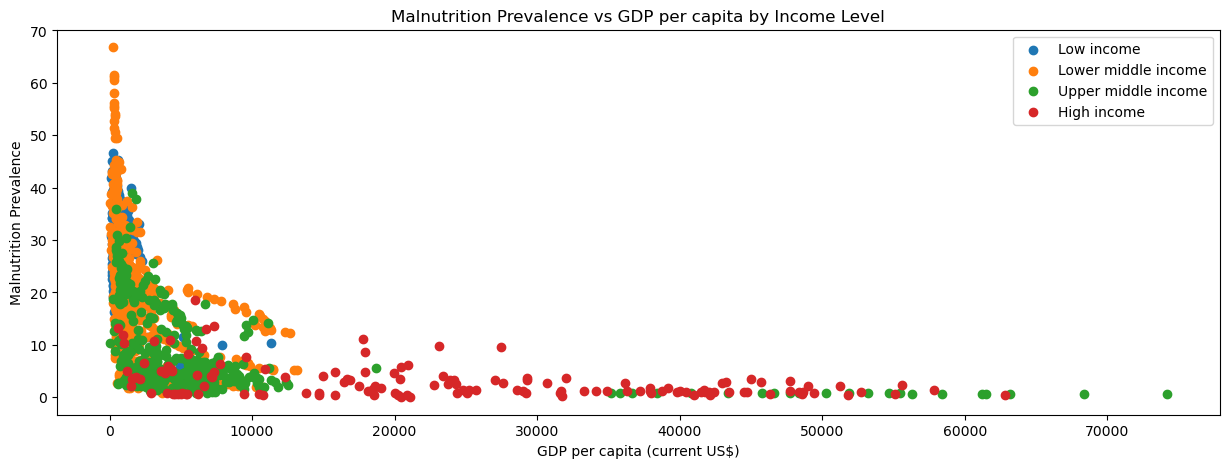

In [6]:
#Define a region and Income Levels
regions = [
    'South Asia',
    'Europe & Central Asia',
    'Sub-Saharan Africa',
    'Middle East & North Africa',
    'Latin America & Caribbean',
    'East Asia & Pacific'
]

colors = [np.random.rand(3,) for _ in range(6)]

income_levels =[
    'Low income',
    'Lower middle income',
    'Upper middle income',
    'High income'
]
#Read the data
meta_data = pd.read_csv("metadata.csv")
country_data = pd.read_csv("country_data.csv")

merged_information =pd.merge(meta_data, country_data, on=['Country Code'], how='left')
merged_information.rename(columns={'Country Name':'country', 'Country Code':'code'}, inplace=True)


#Create for loop for handling a missing value in region and IncomeGroup
for i, info in enumerate(merged_information.values):
    if(info[1] !=info[1]):
        merged_information['Region'][i] = merged_information['Region'][i-1]
    if(info[2] != info[2]):
        merged_information['IncomeGroup'][i] = merged_information['IncomeGroup'][i-1]
        
data_frame = pd.merge(data, merged_information, on=['country'], how='left')
 
plt.figure(figsize=(15, 7))    
for region in regions:
    info_region = data_frame[data_frame["Region"] == region]
    info_region.columns
    
#Plotting the region    

    plt.scatter(
        info_region["GDP per capita (current US)"],
        info_region["Malnutrition prevalence"],
#         alpha=0.5, 
        label= region,
    )
plt.title("Malnutrition Prevalence vs GDP per capita by Geographical regions")
plt.xlabel("GDP per Capita (current US$)")
plt.ylabel("Malnutrition Prevalence, weight for age (% ofunder 5)")
            
plt.legend()

#plot Income levels

plt.figure(figsize=(15,5))

for income_level in income_levels:
    info_income = data_frame[data_frame["IncomeGroup"] == income_level]
    
    plt.scatter(
        info_income["GDP per capita (current US)"],
        info_income["Malnutrition prevalence"],
#         alpha=0.5,
        label=income_level,
    )
    
plt.title("Malnutrition Prevalence vs GDP per capita by Income Level")
plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Malnutrition Prevalence")
plt.legend()



# Question 2

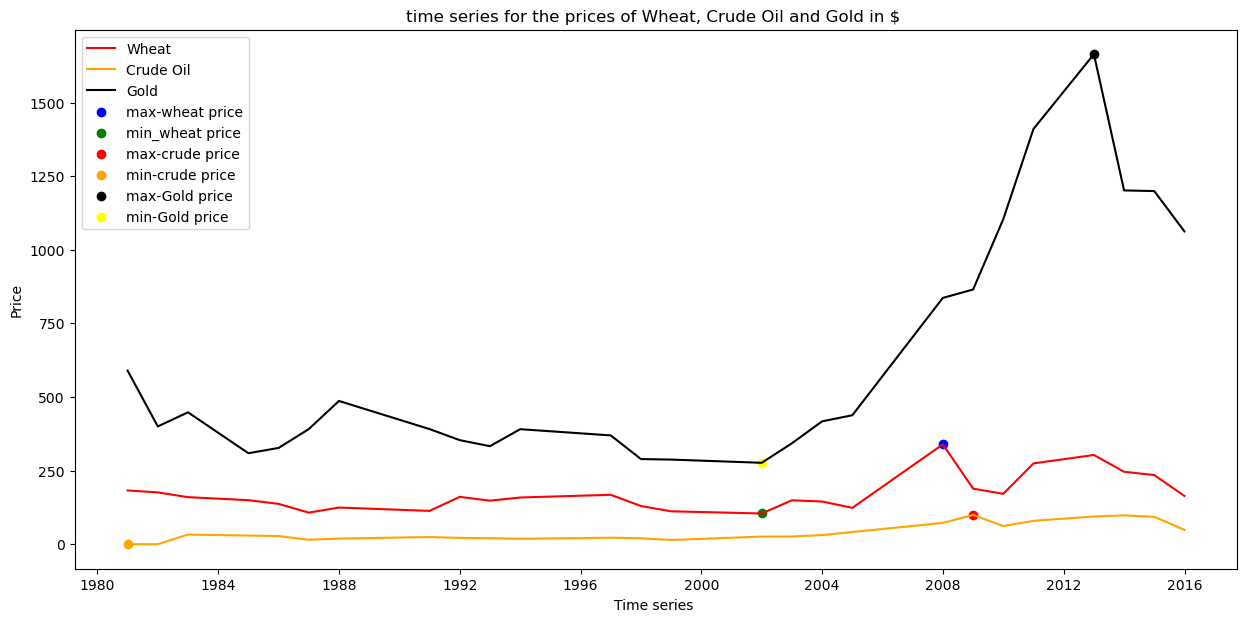

In [27]:
import quandl
# import pandas as pd
import matplotlib.pyplot as plt

#Set Api Key
quandl.ApiConfig.api_key = 'ZVuhCUSabdWk_7kCPzhz'

#Download data fow wheat, crude oil, and Gold Prices

wheat_data = quandl.get("ODA/PWHEAMT_USD")
crude_oil_data = quandl.get("WGEC/WLD_CRUDE_WTI")
gold_data = quandl.get("BUNDESBANK/BBK01_WT5511")

crude_oil_data


#merging the whole price
merged_data_1=wheat_data.merge(crude_oil_data,on='Date',how='inner')
merged_data=merged_data_1.merge(gold_data,on='Date',how='inner')
merged_data=merged_data.rename(columns={"Value_x":"Wheat_price", "Value_y":"Crude_Price", "Value":"Gold_price"})
merged_data

#Plotting all three price series
plt.figure(figsize=(15, 7))
plt.plot( merged_data['Wheat_price'], color = 'red', label ='Wheat')
plt.plot(merged_data['Crude_Price'], color = 'orange', label ='Crude Oil')
plt.plot( merged_data['Gold_price'], color ='black', label ='Gold')

#Indicate the maximum and minimun prices in all three time series using colored dots
time_stamp_max = merged_data.idxmax()
time_stamp_min = merged_data.idxmin()

plt.scatter(time_stamp_max[0],merged_data['Wheat_price'].max(),marker = 'o', color= 'blue', label="max-wheat price")
plt.scatter(time_stamp_min[0],merged_data['Wheat_price'].min(),marker='o', color= 'green', label="min_wheat price")


plt.scatter(time_stamp_max[1],merged_data['Crude_Price'].max(),marker = 'o', color= 'red', label="max-crude price")
plt.scatter(time_stamp_min[1],merged_data['Crude_Price'].min(),marker='o', color= 'orange',label= "min-crude price ")

plt.scatter(time_stamp_max[2],merged_data['Gold_price'].max(),marker = 'o', color= 'black', label="max-Gold price")
plt.scatter(time_stamp_min[2],merged_data['Gold_price'].min(),marker='o', color= 'yellow', label="min-Gold price")
plt.title("time series for the prices of Wheat, Crude Oil and Gold in $ ")
plt.xlabel("Time series ")
plt.ylabel("Price")

#use a legend 
plt.legend()

# #show the plot
plt.show()



# Question 3

In [16]:
import wbdata
import pandas as pd


#retrieve data for CO@ emissions per capita for all countries
emissions_Co2_data = wbdata.get_dataframe(indicators={'EN.ATM.CO2E.PC':'CO2 emissions (metric tons per capita)'}, 
                              country='all',  data_date=None, source=None, convert_date=False,keep_levels=False,
                                 cache=True,).dropna()

emissionCo22010=emissions_Co2_data[emissions_Co2_data.index.get_level_values('date')=='2010']



#retrieve data for primary school enrollment percentage for all countries
school_Enrolment_data = wbdata.get_dataframe(indicators={'SE.PRM.NENR':'School enrolment, primary (% net)'}, 
                              country='all',  data_date=None, source=None, convert_date=False,keep_levels=False,
                                   cache=True,).dropna()
schoolEnrolment2010=school_Enrolment_data[school_Enrolment_data.index.get_level_values('date')=='2010']



In [17]:
emissionCo22010.describe(percentiles=[0.05, 0.25,0.75, 0.95])

,CO2 emissions (metric tons per capita)
count,239.000000
mean,4.304657
std,5.069187
min,0.035424
5%,0.114860
25%,0.756011
50%,2.667140
75%,5.891798
95%,15.172009
max,35.548268


In [18]:
schoolEnrolment2010.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,"School enrolment, primary (% net)"
count,166.000000
mean,90.105088
std,9.527627
min,45.077410
5%,66.656820
25%,87.801005
50%,92.956725
75%,95.934427
95%,98.872787
max,99.713540


# Question 4

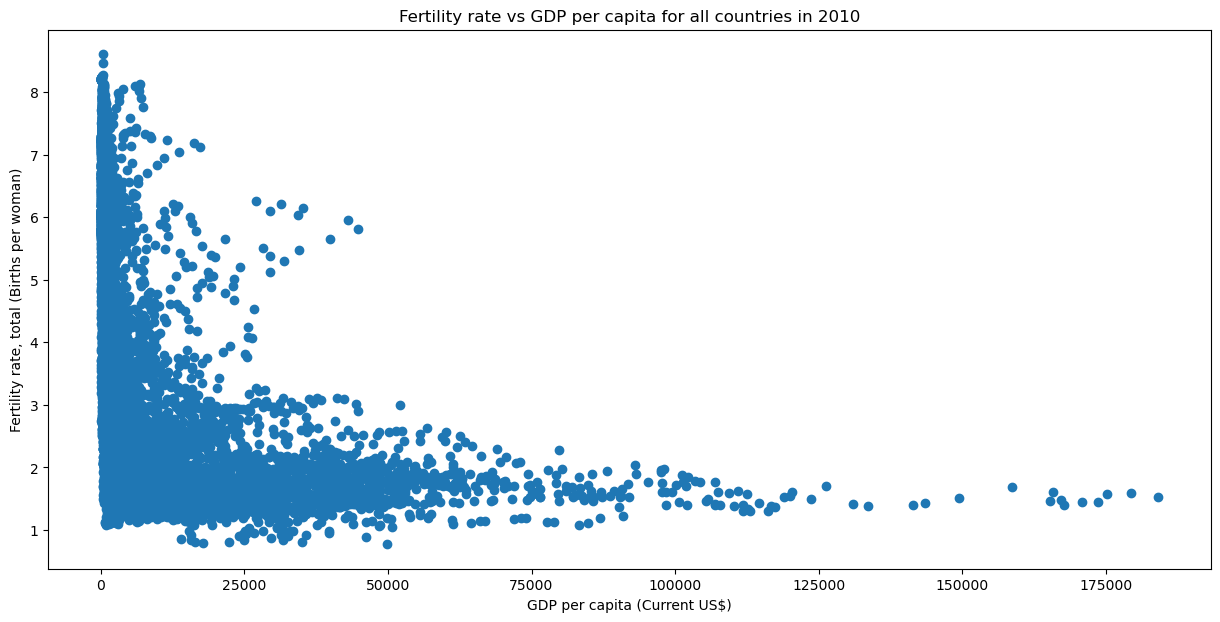

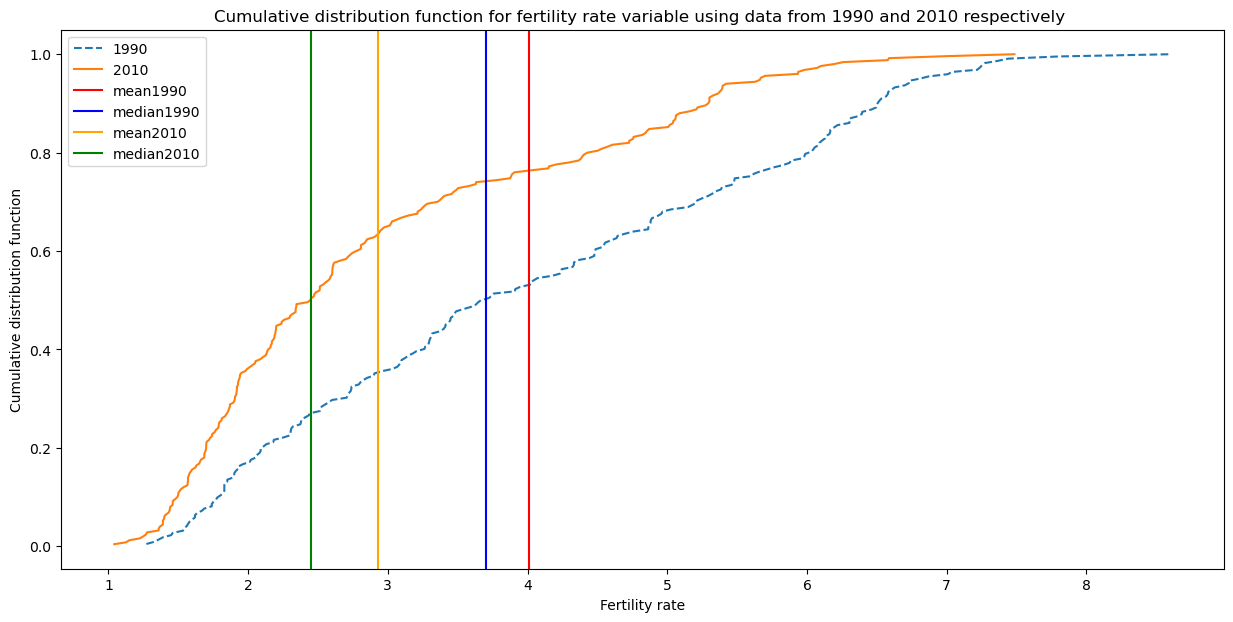

In [12]:
import wbdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
indicators = {'SP.DYN.TFRT.IN':'Fertility rate, total (births per woman)', 'NY.GDP.PCAP.CD':'GDP per capita (current US)'}

#load data
data = wbdata.get_dataframe(indicators=indicators, country='all',  data_date=None, source=None, convert_date=False,
    keep_levels=False,
    cache=True,).dropna()


#Scatter plot of Frtility rate versus GDP per capita
plt.figure(figsize=(15, 7))
plt.scatter(data['GDP per capita (current US)'], data['Fertility rate, total (births per woman)'], label='country')
plt.xlabel("GDP per capita (Current US$)")
plt.ylabel("Fertility rate, total (Births per woman)")
plt.title("Fertility rate vs GDP per capita for all countries in 2010")
plt.show()

#last_data=data['Fertility rate, total (births per woman)']
feritility_1990 = data[data.index.get_level_values('date')=='1990']
fertility_2010 = data[data.index.get_level_values('date')=='2010']
mean_I=round(feritility_1990.mean(),2)
median_I=round(feritility_1990.median(),2)
mean_II = round(fertility_2010.mean(),2)
median_II =round(fertility_2010.median(),2)

x_1990 = np.sort(feritility_1990['Fertility rate, total (births per woman)'])
x_2010 = np.sort(fertility_2010['Fertility rate, total (births per woman)'])

y_1990 = np.arange(1, len(x_1990) + 1) / len(x_1990)
y_2010 = np.arange(1, len(x_2010) + 1) / len(x_2010)

#plt.scatter(x_1990,y_1990)
plt.figure(figsize=(15, 7))
plt.plot(x_1990, y_1990, label='1990', linestyle ='--')
plt.plot(x_2010, y_2010, label='2010', linestyle ='-')
plt.axvline(mean_I[0],color='red',label='mean1990')
plt.axvline(median_I[0],color='blue',label='median1990')
plt.axvline(mean_II[0], color='orange', label='mean2010')
plt.axvline(median_II [0], color='green', label='median2010')
plt.title("Cumulative distribution function for fertility rate variable using data from 1990 and 2010 respectively ")
plt.xlabel("Fertility rate")
plt.ylabel("Cumulative distribution function")



plt.legend()
plt.show()



# Question 5

C:\Users\Nadine\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


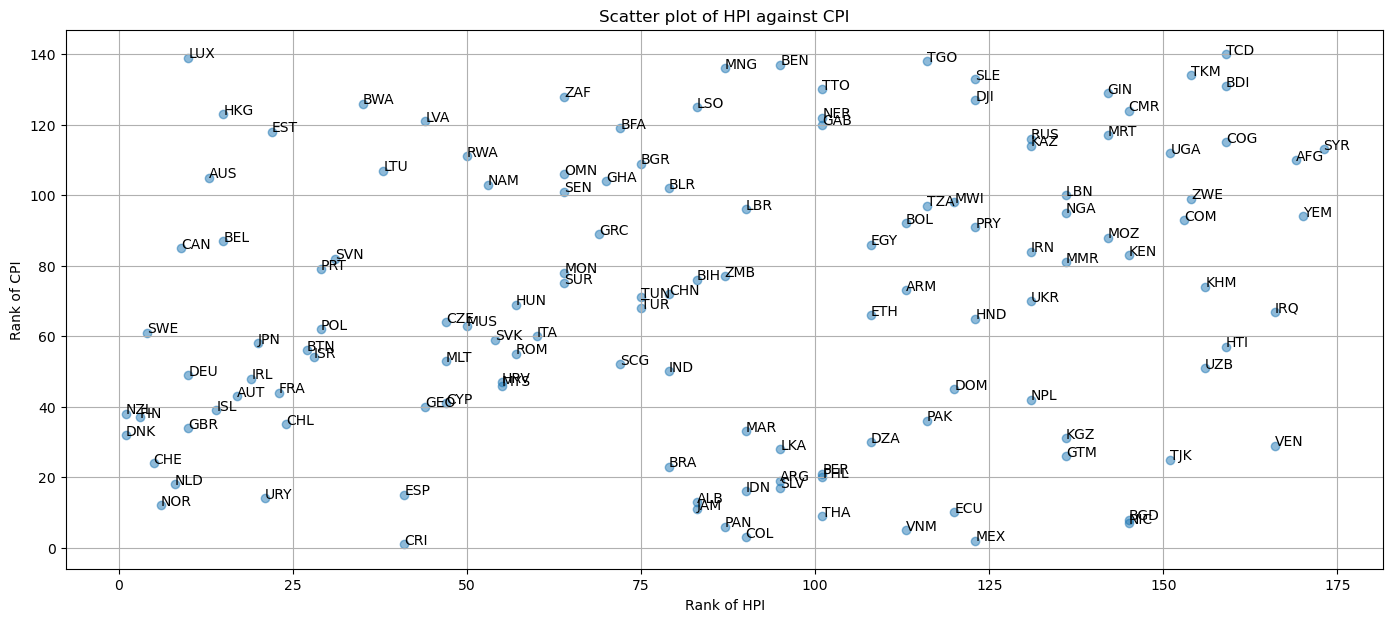

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


#to read the data from excel
hpi_data = pd.read_excel('hpi-data.xlsx')
cpi_data = pd.read_excel('CPI2016_Results.xlsx')



#merge the two datasets on country name

merged_data = pd.merge(hpi_data, cpi_data, on='Country', how='inner')




#create scatter plot of HPI against CPI using ranks
plt.figure(figsize =(17,7))
plt.scatter(merged_data['Rank'], merged_data['HPI Rank'],alpha= 0.5)


#Label data points with country names
for i, country in enumerate (merged_data['WB Code']):
    plt.annotate(country, (merged_data['Rank'][i], merged_data['HPI Rank'][i]), fontsize=10)

    
#add labels to the scatter plot            
plt.xlabel("Rank of HPI")
plt.ylabel("Rank of CPI")
plt.title("Scatter plot of HPI against CPI")

#show scatter plot
plt.grid()
plt.show()

In [ ]:

mergs_data